- Author: Anderson Banihirwe
    
- Project: Tensorflow Recipes

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#Learning-the-TensorFlow-Way-of-Linear-Regression" data-toc-modified-id="Learning-the-TensorFlow-Way-of-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning the TensorFlow Way of Linear Regression</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#Load-data" data-toc-modified-id="Load-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#Declare-our-learning-rate,-batch_size,-placeholders,-model-variables" data-toc-modified-id="Declare-our-learning-rate,-batch_size,-placeholders,-model-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Declare our learning rate, batch_size, placeholders, model variables</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#Formula-for-the-linear-model,-$y=Wx+b$" data-toc-modified-id="Formula-for-the-linear-model,-$y=Wx+b$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Formula for the linear model, $y=Wx+b$</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#Mean-Squared-error-(loss)-function" data-toc-modified-id="Mean-Squared-error-(loss)-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Mean Squared error (loss) function</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/03-linear-regression-tensorflow-way.ipynb#start-training" data-toc-modified-id="start-training-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>start training</a></span></li></ul></li></ul></div>

# Learning the TensorFlow Way of Linear Regression

In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
from sklearn import datasets

## Load data


In [2]:
iris = datasets.load_iris()

In [3]:
train_X = np.array([x[3] for x in iris.data])
train_Y = np.array([y[0] for y in iris.data])
n_samples = train_X.shape[0]
n_samples

150

## Declare our learning rate, batch_size, placeholders, model variables

In [4]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

## Formula for the linear model, $y=Wx+b$

In [7]:
model_output = tf.add(tf.multiply(X, W), b)

## Mean Squared error (loss) function

In [8]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(model_output-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()

## start training

Epoch: 0050 cost= 2.521355391 W= 2.42285 b= 1.08077
Epoch: 0100 cost= 1.458621860 W= 2.68673 b= 1.71784
Epoch: 0150 cost= 1.169882298 W= 2.61229 b= 2.08492
Epoch: 0200 cost= 0.970546365 W= 2.46847 b= 2.36514
Epoch: 0250 cost= 0.810670137 W= 2.31989 b= 2.60544
Epoch: 0300 cost= 0.680743992 W= 2.18123 b= 2.81915
Epoch: 0350 cost= 0.575017214 W= 2.05501 b= 3.0112
Epoch: 0400 cost= 0.488977402 W= 1.94086 b= 3.18427
Epoch: 0450 cost= 0.418954134 W= 1.83782 b= 3.34034
Epoch: 0500 cost= 0.361953467 W= 1.74484 b= 3.48117
Epoch: 0550 cost= 0.315563738 W= 1.66094 b= 3.6082
Epoch: 0600 cost= 0.277808279 W= 1.58526 b= 3.72281
Epoch: 0650 cost= 0.247083485 W= 1.51699 b= 3.82618
Epoch: 0700 cost= 0.222079009 W= 1.4554 b= 3.91944
Epoch: 0750 cost= 0.201726362 W= 1.39984 b= 4.00357
Epoch: 0800 cost= 0.185162544 W= 1.34971 b= 4.07947
Epoch: 0850 cost= 0.171675250 W= 1.30448 b= 4.14798
Epoch: 0900 cost= 0.160697073 W= 1.26367 b= 4.20979
Epoch: 0950 cost= 0.151767775 W= 1.22686 b= 4.26551
Epoch: 1000 cos

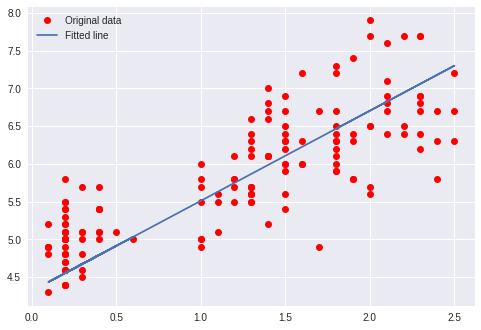

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [10]:
%load_ext version_information
%version_information tensorflow, numpy, matplotlib

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
tensorflow 1.3.0
numpy 1.12.1
matplotlib 2.0.2
Tue Sep 19 19:32:02 2017 CDT